### Imports

In [38]:
import galsim
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

import numpy as np
from SpecklePSF import SpeckleSeries
import pickle
import pandas as pd

scratchdir = '/global/cscratch1/sd/chebert/'
saveDir = './../Fits/hsmFits/'

# find all image files in the scratch directory
fileNames = ! ls /global/cscratch1/sd/chebert/rawSpeckles/ | grep 'img' 
fileNames = [f for f in fileNames if f not in ['img_a_004.fits', 'img_b_004.fits', # frames with no signal 
                                               'img_a_388.fits', 'img_b_388.fits', # frames with no signal 
                                               'img_a_389.fits', 'img_b_389.fits', # frames with no signal 
                                               'img_a_381.fits', 'img_b_381.fits', # frames with no signal 
                                               'img_a_207.fits', 'img_b_207.fits', # frames with no signal 
                                               # b frame: PSF moves suddenly by 60 pixels after 200 frames 
                                               'img_a_218.fits', 'img_b_218.fits', 
                                               'img_a_234.fits', 'img_b_234.fits']] # frames with smudges

In [39]:
# plot settings
fntsize = 12
bcol = 'skyblue'
rcol = 'indianred'

### Run minimal accumulation and fits on all speckles

In [40]:
# for file in fileNames:
#     fileNumber = file.split('.')[0].split('_')[-1]
#     test = SpeckleSeries(fileNumber, 'data', scratchdir)
#     test.fitExposures(fitMethod='hsm', 
#                       maxIters=10000, 
#                       max_amoment=5.0e6, 
#                       max_ashift=120, 
#                       savePath=saveDir)

#### load com and fwhm 

In [41]:
with open('./../Fits/centerOfMassB.p', 'rb') as file:
    comDictB = pickle.load(file)
with open('./../Fits/fwhmB.p', 'rb') as file:
    fwhmDictB = pickle.load(file)

with open('./../Fits/centerOfMassA.p', 'rb') as file:
    comDictA = pickle.load(file)
with open('./../Fits/fwhmA.p', 'rb') as file:
    fwhmDictA = pickle.load(file)

In [42]:
with open('./../Fits/centroidsA.p', 'rb') as file:
    centroidDictA = pickle.load(file)
with open('./../Fits/centroidsB.p', 'rb') as file:
    centroidDictB = pickle.load(file)

In [43]:
# centroidSlopeDictA = {}

# for file in fileNames[:int(len(fileNames)/2)]:
#     pts = np.linspace(0,199,200)
#     x = centroidDictA[file.split('.')[0].split('_')[-1]]['x']
#     y = centroidDictA[file.split('.')[0].split('_')[-1]]['y']
    
#     px = np.polyfit(np.linspace(0,199,200), x, deg=1)
#     py = np.polyfit(np.linspace(0,199,200), y, deg=1)
    
#     centroidSlopeDictA[file] = {'x': px[0]*200, 'y': py[0]*200}
    
# centroidSlopeDictB = {}

# for file in fileNames[int(len(fileNames)/2):]:
#     pts = np.linspace(0,199,200)
#     x = centroidDictB[file.split('.')[0].split('_')[-1]]['x']
#     y = centroidDictB[file.split('.')[0].split('_')[-1]]['y']
    
#     px = np.polyfit(np.linspace(0,199,200), x, deg=1)
#     py = np.polyfit(np.linspace(0,199,200), y, deg=1)
    
#     centroidSlopeDictB[file] = {'x': px[0]*200, 'y': py[0]*200}

#### load all the fits and combine to an object each for g1, a g2, and a HLR

In [44]:
critA, critB, g1_a, g2_b, g1_b, g2_a = {}, {}, {}, {}, {}, {}
hlr_a, hlr_b, x_a, x_b, y_a, y_b = {}, {}, {}, {}, {}, {}

for file in fileNames:
    fileNumber = file.split('.')[0].split('_')[-1]
    with open(saveDir + 'hsm_img_a_' + fileNumber + '_cumulative.p', 'rb') as file:
        hsmA = pickle.load(file)
    with open(saveDir + 'hsm_img_b_' + fileNumber + '_cumulative.p', 'rb') as file:
        hsmB = pickle.load(file)

    critA[fileNumber] = comDictA['img_a_' + fileNumber + '.fits'] + \
                        fwhmDictA['img_a_' + fileNumber + '.fits']
    critB[fileNumber] = comDictB['img_b_' + fileNumber + '.fits'] + \
                        fwhmDictB['img_b_' + fileNumber + '.fits']
    
    g1_a[fileNumber] = hsmA['g1']
    g1_b[fileNumber] = hsmB['g1']
    
    g2_a[fileNumber] = hsmA['g2']
    g2_b[fileNumber] = hsmB['g2']
    
    hlr_a[fileNumber] = hsmA['hlr']
    hlr_b[fileNumber] = hsmB['hlr']
    
    x_a[fileNumber] = hsmA['x']
    x_b[fileNumber] = hsmB['x']
    
    y_a[fileNumber] = hsmA['y']
    y_b[fileNumber] = hsmB['y']

In [45]:
allFits = pd.DataFrame(data={'critA': critA, 'critB': critB, 
                             'g1_a': g1_a, 'g1_b': g1_b, 
                             'g2_a': g2_a, 'g2_b': g2_b, 
                             'hlr_a': hlr_a,'hlr_b': hlr_b,
                             'x_a': x_a, 'x_b': x_b,
                             'y_a': y_a, 'y_b': y_b,
                            })

In [8]:
#this doesn't work cause all my g1_a etc columns are 15x1 arrays....
# allFits.quantile(.1) # <- so need my values to be in a pandas df

### Ellipticity magnitude

### g1

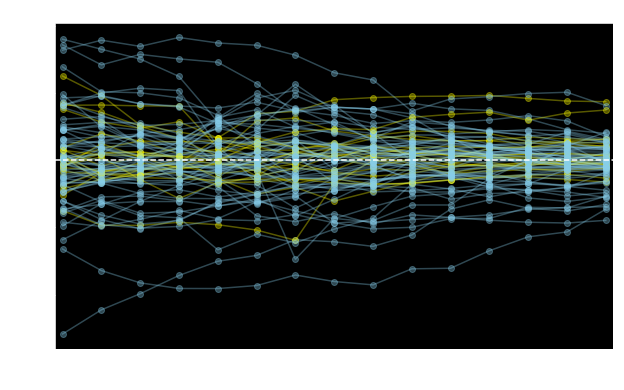

In [11]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'skyblue'    
    plt.plot(pts, allFits['g1_a'].loc[fileNumber], 'o-', alpha=0.35, color=c)

plt.axhline(0, linestyle='--', color='w')
plt.title('filter a: 692 nm')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('g1', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

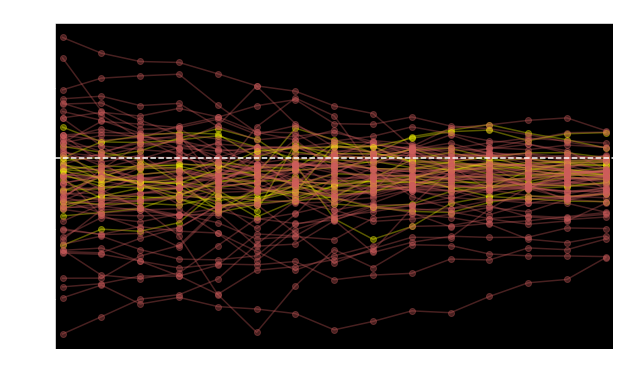

In [12]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 \
        or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'    
    plt.plot(pts, allFits['g1_b'].loc[fileNumber], 'o-', alpha=0.35, color=c)

plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('g1', fontsize=fntsize)
plt.title('filter b: 880 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

### g2

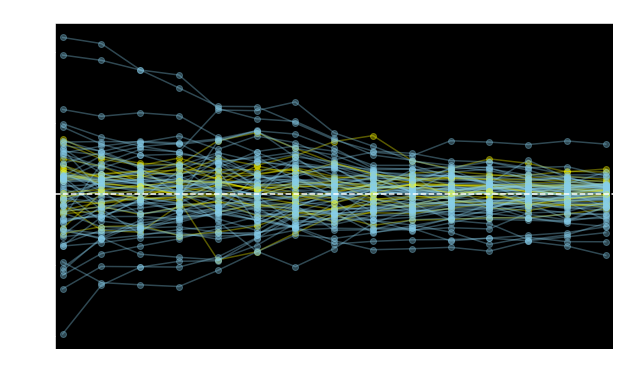

In [13]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 \
        or allFits['critB'].loc[fileNumber] >= 128 else 'skyblue'    
    plt.plot(pts, allFits['g2_a'].loc[fileNumber], 'o-', alpha=0.35, color=c)

plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('g2', fontsize=fntsize)
plt.title('filter a: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

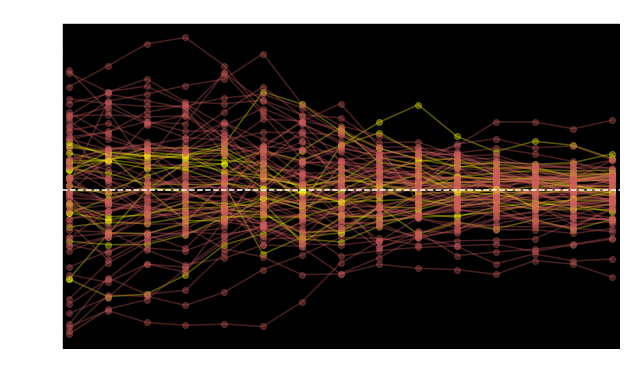

In [14]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'    
    plt.plot(pts, allFits['g2_b'].loc[fileNumber], 'o-', alpha=0.35, color=c)

plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('g2', fontsize=fntsize)
plt.title('filter b: 880 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

### g1 v g2

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


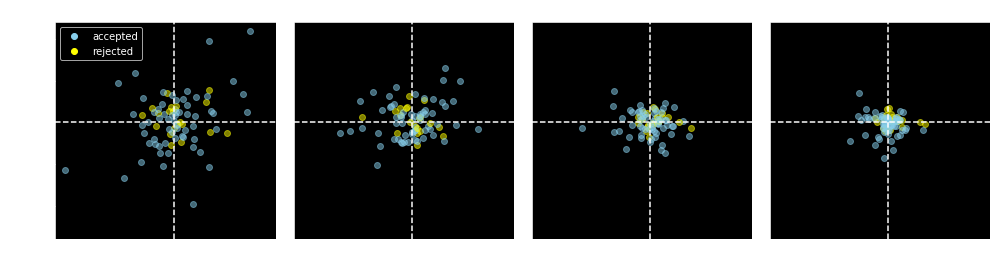

In [15]:
plt.figure(figsize=(14,4))
j = 0
times = [0, 1, 10, 60]
for i in [0, 6, 10, 14]:
    j += 1
    plt.subplot(1, 4, j)
    plt.title(str(times[j-1]) + ' sec')
    for fileNumber in allFits.index:
        c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'skyblue'
        plt.plot(allFits['g1_a'].loc[fileNumber][i], allFits['g2_a'].loc[fileNumber][i], 'o', alpha=0.5, color=c)

    if j in [1]:
        plt.ylabel('g2', fontsize=fntsize)
    else:
        plt.yticks([])
    if j in [1,2, 3, 4]:
        plt.xlabel('g1', fontsize=fntsize)
    else:
        plt.xticks([])
    plt.ylim([-.28,.24])
    plt.xlim([-.28,.24])
    plt.axhline(0, linestyle='--', color='w')
    plt.axvline(0, linestyle='--', color='w')
    
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='skyblue', lw=0, marker='o', label='accepted'),
                   Line2D([0], [0], color='yellow', lw=0, marker='o', label='rejected')
                   ]
plt.subplot(1, 4, 1)
plt.legend(handles=legend_elements)

plt.tight_layout()

plt.savefig('../Plots/g1_g2_filtera.png')
plt.show()

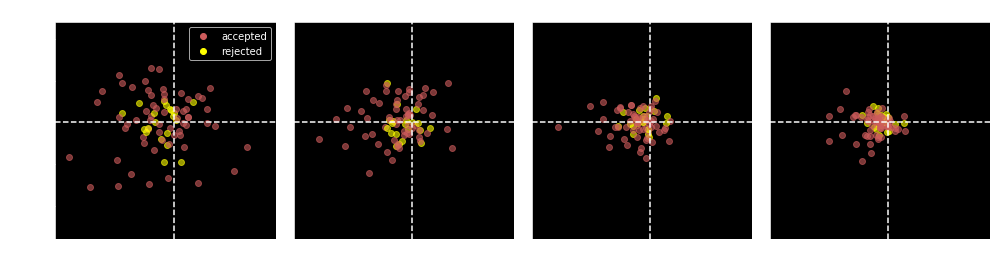

In [16]:
plt.figure(figsize=(14,4))
j = 0
for i in [0, 6, 10, 14]:
    j += 1
    plt.subplot(1, 4, j)
    plt.title(str(times[j-1]) + ' sec')
    for fileNumber in allFits.index:
        c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'
        plt.plot(allFits['g1_b'].loc[fileNumber][i], allFits['g2_b'].loc[fileNumber][i], 'o', alpha=0.6, color=c)

    if j in [1]:
        plt.ylabel('g2', fontsize=fntsize)
    else:
        plt.yticks([])
    if j in [1, 2, 3, 4]:
        plt.xlabel('g1', fontsize=fntsize)
    else:
        plt.xticks([])
    plt.ylim([-.28,.24])
    plt.xlim([-.28,.24])
    plt.axhline(0, linestyle='--', color='w')
    plt.axvline(0, linestyle='--', color='w')
    
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='indianred', lw=0, marker='o', label='accepted'),
                   Line2D([0], [0], color='yellow', lw=0, marker='o', label='rejected')
                   ]
plt.subplot(1, 4, 1)
plt.legend(handles=legend_elements)

plt.tight_layout()

plt.savefig('../Plots/g1_g2_filterb.png')
plt.show()

### HLR

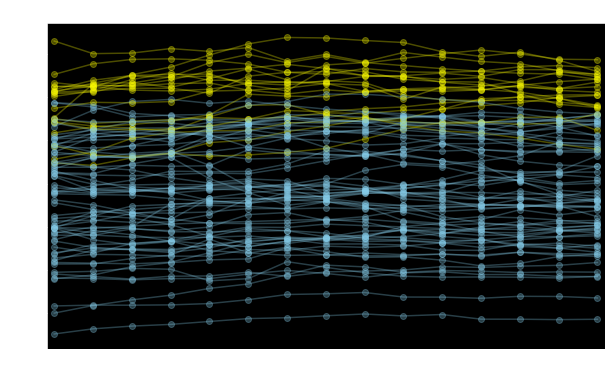

In [17]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'skyblue'    
    plt.plot(pts, allFits['hlr_a'].loc[fileNumber], 'o-', alpha=0.3, color=c)

plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('HLR [arcsec]', fontsize=fntsize)
plt.title('filter a: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

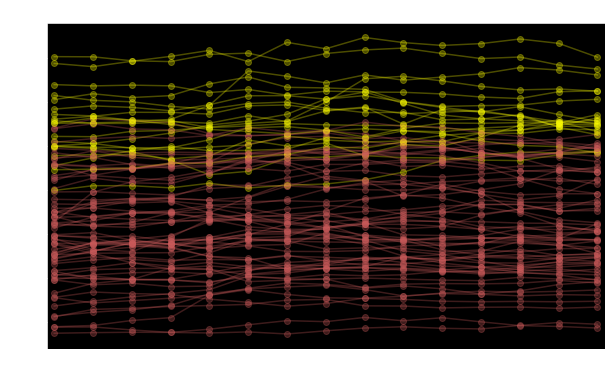

In [18]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'
    plt.plot(pts, allFits['hlr_b'].loc[fileNumber], 'o-', alpha=0.3, color=c)

# plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('HLR [arcsec]', fontsize=fntsize)
plt.title('filter b: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

#### HLR ratio

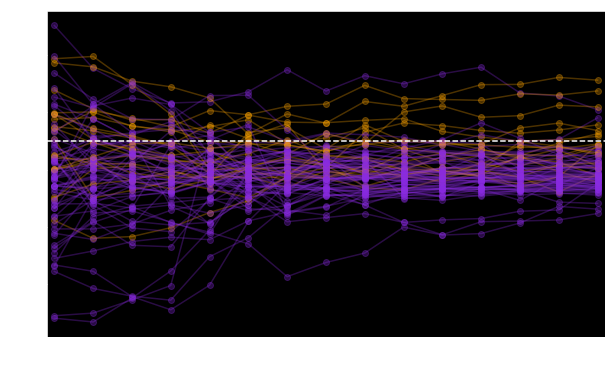

In [19]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'orange' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'blueviolet'    
    plt.plot(pts, allFits['hlr_b'].loc[fileNumber] / allFits['hlr_a'].loc[fileNumber], 'o-', alpha=0.3, color=c)

plt.axhline(.95, linestyle='--', color='w')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('HLR ratio b:a', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

## Only use accepted data now:

### Do PSF parameters correlate with centroid slope?

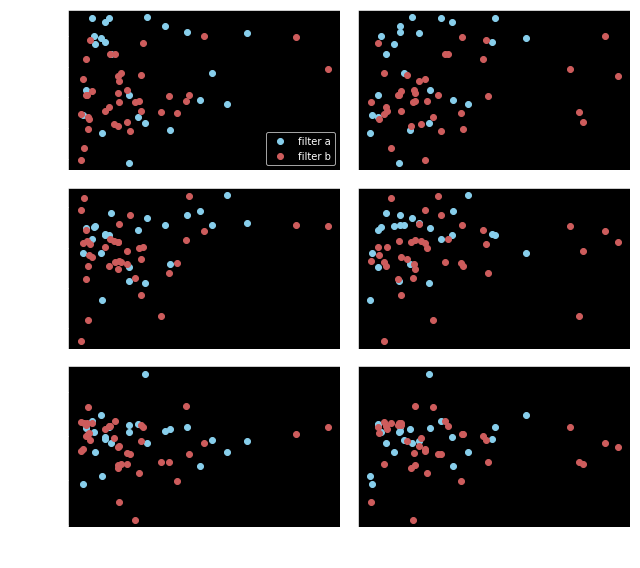

In [25]:
plt.figure(figsize=(9,8))
N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N)
x_a = []
y_a = []
hlr_a = []
g1_a = []
g2_a = []

x_b = []
y_b = []
hlr_b = []
g1_b = []
g2_b = []


for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 0 if allFits['critA'].loc[fileNumber] >= 128 \
                or allFits['critB'].loc[fileNumber] >= 128 else 1  
    N_accepted += (accepted[i] - 1)
    if i<=int(N/2) and accepted[i]:
        x_a.append(centroidSlopeDictA['img_a_' + fileNumber + '.fits']['x'])
        y_a.append(centroidSlopeDictA['img_a_' + fileNumber + '.fits']['y'])
        hlr_a.append(allFits['hlr_a'].loc[fileNumber][14])
        g1_a.append(allFits['g1_a'].loc[fileNumber][14])
        g2_a.append(allFits['g2_a'].loc[fileNumber][14])
    elif i>int(N/2) and accepted[i]:
        x_b.append(centroidSlopeDictB['img_b_' + fileNumber + '.fits']['x'])
        y_b.append(centroidSlopeDictB['img_b_' + fileNumber + '.fits']['y'])
        hlr_b.append(allFits['hlr_b'].loc[fileNumber][14])
        g1_b.append(allFits['g1_b'].loc[fileNumber][14])
        g2_b.append(allFits['g2_b'].loc[fileNumber][14])

plt.subplot(321)
plt.plot(np.abs(x_a), hlr_a, 'o', color=bcol, label='filter a')
plt.plot(np.abs(x_b), hlr_b, 'o', color=rcol, label='filter b')
plt.xticks([])
plt.ylabel('HLR [arcsec]', fontsize=fntsize)
plt.legend()

plt.subplot(322)
plt.plot(np.abs(y_a), hlr_a, 'o', color=bcol, label='filter a')
plt.plot(np.abs(y_b), hlr_b, 'o', color=rcol, label='filter b')
plt.xticks([])
plt.yticks([])

plt.subplot(323)
plt.plot(np.abs(x_a), g1_a, 'o', color=bcol, label='filter a')
plt.plot(np.abs(x_b), g1_b, 'o', color=rcol, label='filter b')
plt.xticks([])
plt.ylabel('g1', fontsize=fntsize)
plt.yticks([-.125,-.075,-.025,.025])

plt.subplot(324)
plt.plot(np.abs(y_a), g1_a, 'o', color=bcol, label='filter a')
plt.plot(np.abs(y_b), g1_b, 'o', color=rcol, label='filter b')
plt.xticks([])
plt.yticks([])

plt.subplot(325)
plt.plot(np.abs(x_a), g2_a, 'o', color=bcol, label='filter a')
plt.plot(np.abs(x_b), g2_b, 'o', color=rcol, label='filter b')
plt.xlabel('|x centroid slope|  [pixel/minute]', fontsize=fntsize)
plt.ylabel('g2', fontsize=fntsize)
plt.yticks([-.1,-.05,0,.05])

plt.subplot(326)
plt.plot(np.abs(y_a), g2_a, 'o', color=bcol, label='filter a')
plt.plot(np.abs(y_b), g2_b, 'o', color=rcol, label='filter b')
plt.xlabel('|y centroid slope|  [pixel/minute]', fontsize=fntsize)
plt.yticks([])

plt.tight_layout()
plt.savefig('../Plots/PSFparamsVcentroidSlope.png')
plt.show()

In [24]:
len(fileNames)/2 - 20

62.0

## Mean and $\sigma$ plots

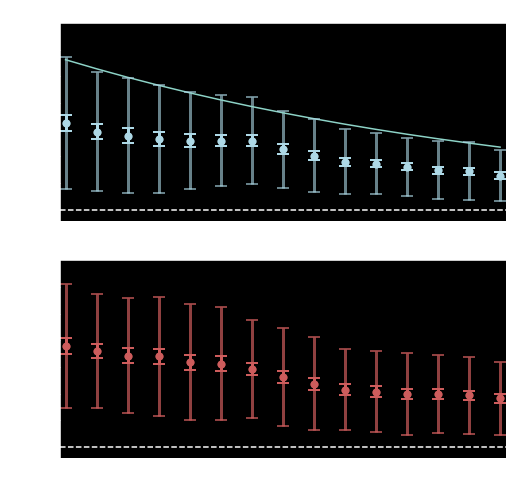

In [50]:
pts = np.logspace(-1.22,1.79,15)

N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N)

for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 0 if allFits['critA'].loc[fileNumber] >= 128 \
                or allFits['critB'].loc[fileNumber] >= 128 else 1  
    N_accepted += (accepted[i] - 1)

g = np.ones((2, N, 15))

for i in range(N):
    fileNumber = allFits.index[i]
    g[0, i] = np.sqrt(allFits['g1_a'].loc[fileNumber]**2 + allFits['g2_a'].loc[fileNumber]**2) * accepted[i]
    g[1, i] = np.sqrt(allFits['g1_b'].loc[fileNumber]**2 + allFits['g2_b'].loc[fileNumber]**2) * accepted[i]

g = g[:,accepted.astype('bool')]

gMean = g.mean(axis=1)
gStdDev = g.std(axis=1)
gMeanError = gStdDev / np.sqrt(N_accepted)

from scipy.optimize import curve_fit
def power_law(t, alpha, b):
    return alpha*np.log(t)+b
yA = np.percentile(g[0], 84.1, axis=0)
p, c = curve_fit(power_law, xdata=pts, ydata= np.log(yA))

# g_percentiles = np.hstack([np.percentile(g[0], axis=0, q=90), np.percentile(g[0], axis=0, q=10)])
  
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.axhline(0, linestyle='--', color='w')
plt.plot(pts, np.exp(power_law(pts,p[0],p[1])))
# plt.errorbar(pts, gMean[0], yerr=gStdDev[0], fmt='o', color='lightblue', 
#              capsize=6, linewidth=3, markeredgewidth=2, alpha=0.6)
plt.errorbar(pts, gMean[0], yerr=gStdDev[0], fmt='o', color='lightblue', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.6)
plt.errorbar(pts, gMean[0], yerr=gMeanError[0], fmt='o', color='lightblue', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.title('filter a: 692 nm')
plt.ylabel('|g|', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.ylim([-.01, .175])
plt.xticks([])

plt.subplot(2,1,2)
plt.axhline(0, linestyle='--', color='w')
plt.errorbar(pts, gMean[1], yerr=gStdDev[1], fmt='o', color='indianred', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.7)
plt.errorbar(pts, gMean[1], yerr=gMeanError[1], fmt='o', color='indianred', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.title('filter b: 880 nm')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('|g|', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.ylim([-.01, .175])
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])

plt.savefig('../Plots/g_mag_stats.png')
plt.show()

In [51]:
p

array([-0.12584441, -2.31564287])

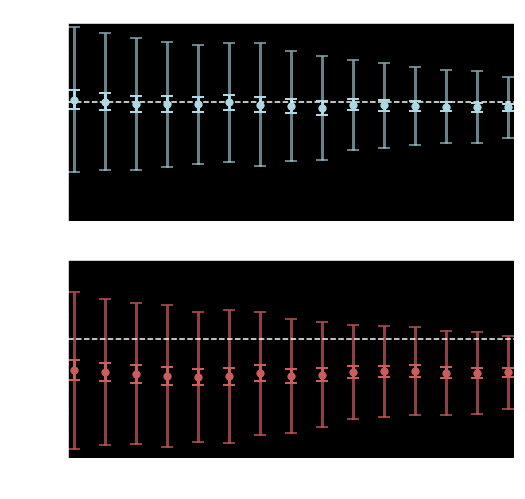

In [23]:
pts = np.logspace(-1.22,1.79,15)

N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N)

for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 0 if allFits['critA'].loc[fileNumber] >= 128 \
                or allFits['critB'].loc[fileNumber] >= 128 else 1  
    N_accepted += (accepted[i] - 1)

g1 = np.ones((2, N, 15))

for i in range(N):
    fileNumber = allFits.index[i]
    g1[0, i] = allFits['g1_a'].loc[fileNumber] * accepted[i]
    g1[1, i] = allFits['g1_b'].loc[fileNumber] * accepted[i]
    
g1 = g1[:,accepted.astype('bool')]
g1Mean = g1.mean(axis=1)
g1StdDev = g1.std(axis=1)
g1MeanError = g1StdDev / np.sqrt(N_accepted)
  
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.axhline(0, linestyle='--', color='w')
plt.errorbar(pts, g1Mean[0], yerr=g1StdDev[0], fmt='o', color='lightblue', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.6)
plt.errorbar(pts, g1Mean[0], yerr=g1MeanError[0], fmt='o', color='lightblue', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.title('filter a: 692 nm')
plt.ylabel('g1', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.ylim([-.12,.08])
plt.xticks([])

plt.subplot(2,1,2)
plt.axhline(0, linestyle='--', color='w')
plt.errorbar(pts, g1Mean[1], yerr=g1StdDev[1], fmt='o', color='indianred', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.7)
plt.errorbar(pts, g1Mean[1], yerr=g1MeanError[1], fmt='o', color='indianred', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.title('filter b: 880 nm')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('g1', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.ylim([-.12,.08])
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])

plt.savefig('../Plots/g1_stats.png')
plt.show()

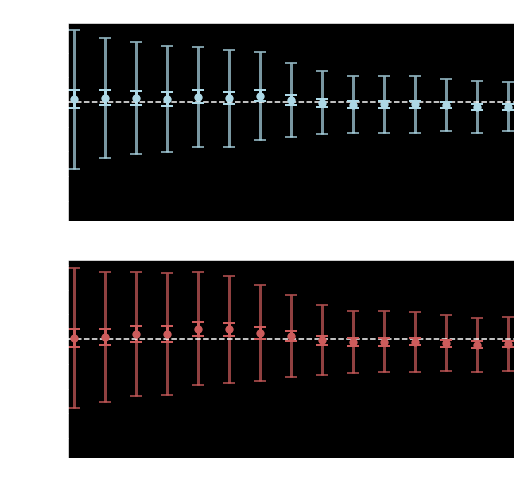

In [24]:
pts = np.logspace(-1.22,1.79,15)

N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N)

for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 1 if allFits['critA'].loc[fileNumber] < 128 \
                and allFits['critB'].loc[fileNumber] < 128 else 0  
    N_accepted += (accepted[i] - 1)

g2 = np.ones((2, N, 15))

for i in range(N):
    fileNumber = allFits.index[i]
    g2[0, i] = allFits['g2_a'].loc[fileNumber] * accepted[i]
    g2[1, i] = allFits['g2_b'].loc[fileNumber] * accepted[i]
    
g2 = g2[:,accepted.astype('bool')]
g2Mean = g2.mean(axis=1)
g2StdDev = g2.std(axis=1)
g2MeanError = g2StdDev / np.sqrt(N_accepted)
  
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.axhline(0, linestyle='--', color='w')
plt.errorbar(pts, g2Mean[0], yerr=g2StdDev[0], fmt='o', color='lightblue', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.7)
plt.errorbar(pts, g2Mean[0], yerr=g2MeanError[0], fmt='o', color='lightblue', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.title('filter a: 692 nm')
plt.ylabel('g2', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.ylim([-.12,.08])
plt.xticks([])

plt.subplot(2,1,2)
plt.axhline(0, linestyle='--', color='w')
plt.errorbar(pts, g2Mean[1], yerr=g2StdDev[1], fmt='o', color='indianred', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.7)
plt.errorbar(pts, g2Mean[1], yerr=g2MeanError[1], fmt='o', color='indianred', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.title('filter b: 880 nm')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('g2', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.ylim([-.12,.08])
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])

plt.savefig('../Plots/g2_stats.png')
plt.show()

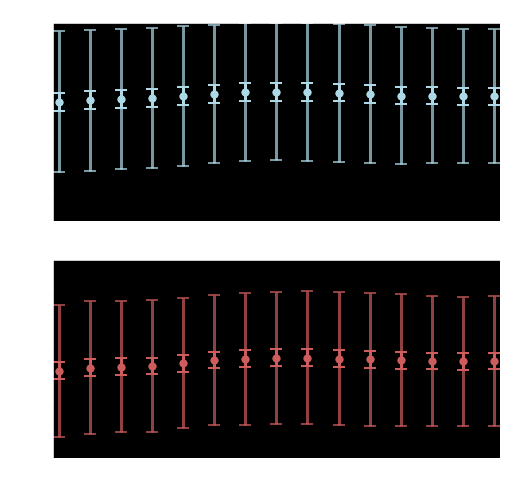

In [25]:
pts = np.logspace(-1.22,1.79,15)

N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N)

for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 0 if allFits['critA'].loc[fileNumber] >= 128 \
                or allFits['critB'].loc[fileNumber] >= 128 else 1  
    N_accepted += (accepted[i] - 1)

hlr = np.ones((2, N, 15))

for i in range(N):
    fileNumber = allFits.index[i]
    hlr[0, i] = allFits['hlr_a'].loc[fileNumber] * accepted[i]
    hlr[1, i] = allFits['hlr_b'].loc[fileNumber] * accepted[i]

hlr = hlr[:,accepted.astype('bool')]

hlrMean = hlr.mean(axis=1)
hlrStdDev = hlr.std(axis=1)
hlrMeanError = hlrStdDev / np.sqrt(N_accepted)
  
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
# plt.axhline(0, linestyle='--', color='w')
plt.errorbar(pts, hlrMean[0], yerr=hlrStdDev[0], fmt='o', color='lightblue', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.7)
plt.errorbar(pts, hlrMean[0], yerr=hlrMeanError[0], fmt='o', color='lightblue', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.title('filter a: 692 nm', fontsize=fntsize)
plt.ylabel('hlr', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.ylim([.25, .6])
plt.xticks([])

plt.subplot(2,1,2)
# plt.axhline(0, linestyle='--', color='w')
plt.errorbar(pts, hlrMean[1], yerr=hlrStdDev[1], fmt='o', color='indianred', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.7)
plt.errorbar(pts, hlrMean[1], yerr=hlrMeanError[1], fmt='o', color='indianred', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.title('filter b: 880 nm')
plt.xlabel('exposure time', fontsize=fntsize)
plt.ylabel('hlr', fontsize=fntsize)
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.ylim([.25, .6])
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])

plt.savefig('../Plots/hlr_stats.png')
plt.show()

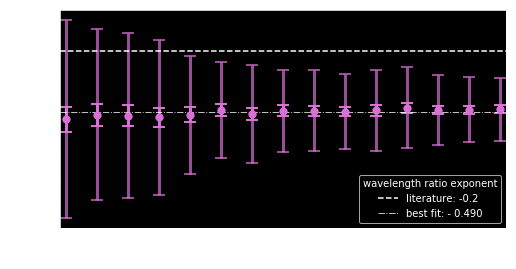

In [41]:
pts = np.logspace(-1.22,1.79,15)

N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N)

for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 0 if allFits['critA'].loc[fileNumber] >= 128 \
                or allFits['critB'].loc[fileNumber] >= 128 else 1  
    N_accepted += (accepted[i] - 1)

hlr_ratio = np.ones((N, 15))

for i in range(N):
    fileNumber = allFits.index[i]
    hlr_ratio[i] = allFits['hlr_b'].loc[fileNumber] / allFits['hlr_a'].loc[fileNumber] * accepted[i]

hlrMean = hlr_ratio.sum(axis=0) / N_accepted
hlrStdDev = hlr_ratio[accepted.astype('bool')].std(axis=0)
hlrMeanError = hlrStdDev / np.sqrt(N_accepted)
  
from scipy.optimize import curve_fit
def straightLine(x, b):
    return x + b
p, c = curve_fit(straightLine, xdata=np.zeros(15), ydata=hlrMean)
alpha = np.log(p[0])/np.log((692/880))

plt.figure(figsize=(8,4))

plt.errorbar(pts, hlrMean, yerr=hlrStdDev, fmt='o', color='orchid', 
             capsize=6, linewidth=3, markeredgewidth=2, alpha=0.7)
plt.errorbar(pts, hlrMean, yerr=hlrMeanError, fmt='o', color='orchid', 
             capsize=6, linewidth=3, markeredgewidth=2)
plt.ylabel('hlr ratio b:a', fontsize=fntsize)
plt.xscale('log')
plt.axhline(.95, linestyle='--', color='w', label='literature: -0.2')
plt.axhline(p[0], linestyle='-.', color='w', linewidth=1, alpha=.75, label=f'best fit: -{alpha: .3f}')

plt.legend(title='wavelength ratio exponent')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.xlabel('exposure time', fontsize=fntsize)

plt.savefig('../Plots/hlr_ratio_stats.png')
plt.show()

## Mode and quantile plots

In [10]:
N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N)
for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 0 if allFits['critA'].loc[fileNumber] >= 128 \
                or allFits['critB'].loc[fileNumber] >= 128 else 1  
    N_accepted += (accepted[i] - 1)

In [23]:
def addExpTimeAxis(fig, subplotN, fntsize, label=True, tickLabels=True):
    logAx = fig.add_subplot(subplotN, label="2", frame_on=False)
    logAx.set_yticks([])
    if label: 
        logAx.set_xlabel('exposure time [sec]', fontsize=fntsize)
    logAx.set_xscale('log')
    logAx.set_xlim((0.055,.068*1000))
    logAx.set_xticks([.06, 1, 10, 60])
    if tickLabels: 
        logAx.set_xticklabels([.06, 1, 10, 60])
    else:
        logAx.set_xticklabels([])

def makeBoxPlot(fig, subplotN, data, mainColor, medianColor, xLabel=True, hline=True, fliers=False):
    ax = fig.add_subplot(subplotN)
    if hline:
        plt.axhline(0, color='white', linewidth=1, alpha=.75)

    bp = ax.boxplot(data, whis=[15.9,84.1],
                    flierprops={'markeredgecolor':mainColor}, sym='',
                    widths=.15, patch_artist=True)
    ax.set_xticks([])
    ax.set_xticklabels([])
    addExpTimeAxis(fig, subplotN, fntsize, label=xLabel, tickLabels=xLabel)

    for element in ['boxes', 'whiskers', 'medians', 'caps']:
        plt.setp(bp[element], color=mainColor, linewidth=2, alpha=.75)
    plt.setp(bp['medians'], color=medianColor, linewidth=4)
    if fliers: plt.setp(bp['fliers'], alpha=.75, ms=3)
    return ax

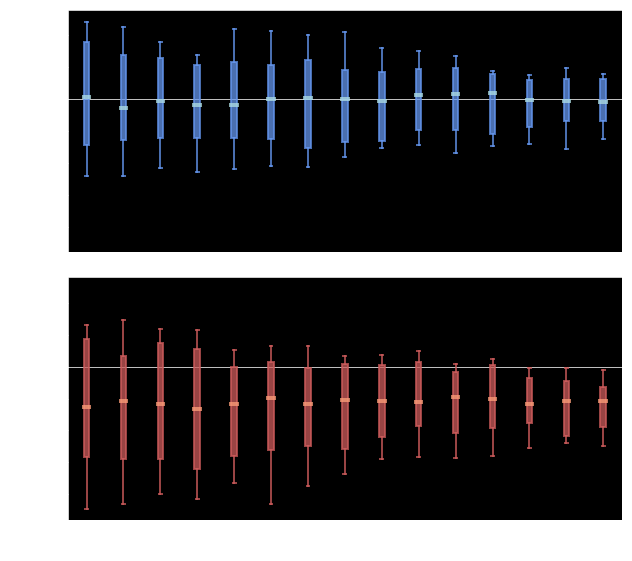

In [37]:
g1A = np.array([np.array(allFits['g1_a'].values[i]) for i in range(N) if accepted[i]])
g1B = np.array([np.array(allFits['g1_b'].values[i]) for i in range(N) if accepted[i]])

fig = plt.figure(1, figsize=(9, 8))

## filter a
ax = makeBoxPlot(fig, 211, g1A, mainColor='cornflowerblue', medianColor='powderblue', xLabel=False)
ax.set_ylabel('g1', fontsize=fntsize)
ax.set_ylim([-.12,.07])

## filter b
ax2 = makeBoxPlot(fig, 212, g1B, mainColor='indianred', medianColor='lightsalmon')
ax2.set_ylabel('g1', fontsize=fntsize)
ax2.set_ylim([-.12,.07])

plt.tight_layout()

plt.savefig('../Plots/g1_percentiles.png')
plt.show()

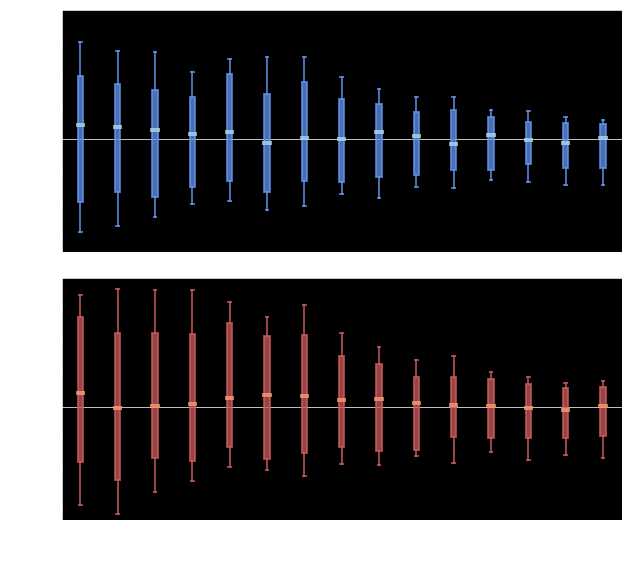

In [36]:
g2A = np.array([np.array(allFits['g2_a'].values[i]) for i in range(N) if accepted[i]])
g2B = np.array([np.array(allFits['g2_b'].values[i]) for i in range(N) if accepted[i]])

fig = plt.figure(1, figsize=(9, 8))

## filter a
ax = makeBoxPlot(fig, 211, g2A, mainColor='cornflowerblue', medianColor='powderblue', xLabel=False)
ax.set_ylabel('g2', fontsize=fntsize)
ax.set_ylim([-.07,.08])

## filter b
ax2 = makeBoxPlot(fig, 212, g2B, mainColor='indianred', medianColor='lightsalmon')
ax2.set_ylabel('g2', fontsize=fntsize)
ax2.set_ylim([-.07,.08])

plt.tight_layout()
plt.savefig('../Plots/g2_percentiles.png')
plt.show()

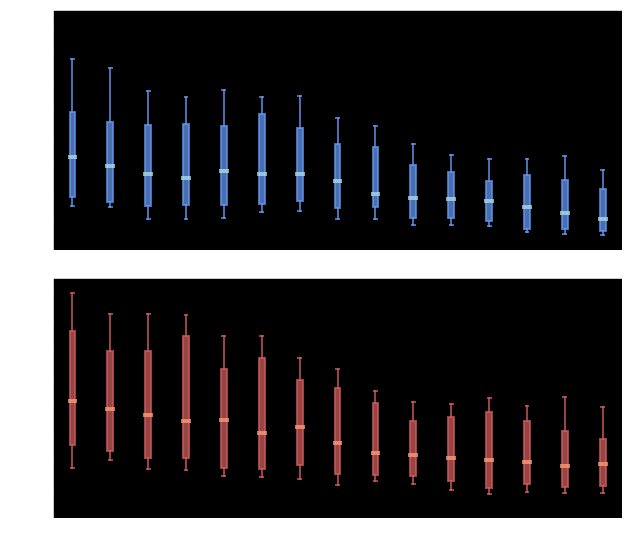

In [32]:
g1A = np.array([np.array(allFits['g1_a'].values[i]) for i in range(N) if accepted[i]])
g1B = np.array([np.array(allFits['g1_b'].values[i]) for i in range(N) if accepted[i]])
g2A = np.array([np.array(allFits['g2_a'].values[i]) for i in range(N) if accepted[i]])
g2B = np.array([np.array(allFits['g2_b'].values[i]) for i in range(N) if accepted[i]])

gA = np.sqrt(g1A**2 + g2A**2)
gB = np.sqrt(g1B**2 + g2B**2)

fig = plt.figure(1, figsize=(9, 8))

## filter a
ax = makeBoxPlot(fig, 211, gA, mainColor='cornflowerblue', medianColor='powderblue', xLabel=False)
ax.set_ylabel('|g|', fontsize=fntsize)
ax.set_ylim([0,.17])

## filter b
ax2 = makeBoxPlot(fig, 212, gB, mainColor='indianred', medianColor='lightsalmon')
ax2.set_ylabel('|g|', fontsize=fntsize)
ax2.set_ylim([0,.17])

plt.tight_layout()
plt.savefig('../Plots/gmag_percentiles.png')

plt.show()

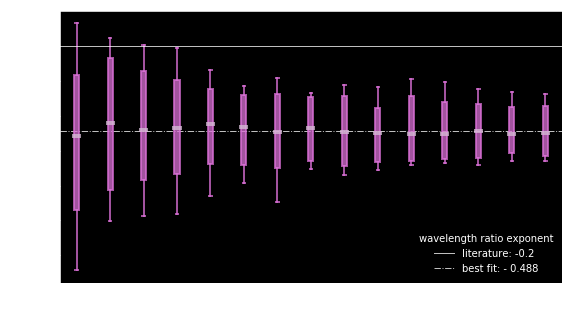

In [35]:
hlrA = np.array([np.array(allFits['hlr_a'].values[i]) for i in range(N) if accepted[i]])
hlrB = np.array([np.array(allFits['hlr_b'].values[i]) for i in range(N) if accepted[i]])

medianRatio = np.median(hlrB/hlrA, axis=0)
from scipy.optimize import curve_fit
def straightLine(x, b):
    return x + b
p, c = curve_fit(straightLine, xdata=np.zeros(15), ydata=medianRatio)
alpha = np.log(p[0])/np.log((692/880))

fig = plt.figure(1, figsize=(9, 5))

ax = makeBoxPlot(fig, 111, hlrB/hlrA, mainColor='orchid', medianColor='thistle', hline=False)
ax.set_ylabel('HLR b:a', fontsize=fntsize)
ax.axhline(.95, color='w', linewidth=1, alpha=.75, label='literature: -0.2')
ax.axhline(p[0], linestyle='-.', color='w', linewidth=1, alpha=.75, label=f'best fit: -{alpha: .3f}')

ax.legend(title='wavelength ratio exponent', frameon=False)
plt.savefig('../Plots/hlr_percentiles.png')

plt.show()